# Mnist Digit Classifier Model

In [33]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import matplotlib.pyplot as plt
import tensorflow as tf

In [50]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
n_output = 10

In [51]:
X_test[0].shape

(28, 28)

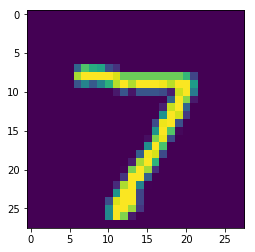

The label for the image is 7


In [52]:
plt.imshow(X_test[0])
plt.show()
print(f'The label for the image is {y_test[0]}')

## Data Preprocessing

The Conv2D layer accepts the data shape to be of size 3 the third represeting the depth for rgb 3 grayscale 1 and so on.
and the features need to scaled down to to a scale of 0 - 1 where 0 pixels represents white and 1 represents complete black,
this is so that it will improve the performance of the network when training and to get rid of outliers which will cause bias to the network.

And adding categorical features to the output to be passed into the softmax function.

In [53]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
X_train = X_train / 255
X_test = X_test / 255 

In [54]:
from sklearn.preprocessing import OneHotEncoder

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

encoder = OneHotEncoder(categories=[range(n_output)])
y_train = encoder.fit_transform(y_train).toarray()
y_test = encoder.fit_transform(y_test).toarray()
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

## Model Creation

In [57]:
def create_model():
    model = Sequential()

    model.add(Conv2D(64, (3, 3), padding='valid', input_shape=X_train.shape[1:], activation='relu'))

    model.add(MaxPooling2D((2,2)))

    model.add(Dropout(0.25))

    model.add(Conv2D(32, (3, 3), padding='valid', activation='relu'))

    model.add(MaxPooling2D((2,2)))

    model.add(Dropout(0.25))

    model.add(Conv2D(32, (3, 3), padding='valid', activation='relu'))

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))

    model.add(Dense(n_output, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    model.summary()
    return model

In [60]:
model = create_model()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 32)         

In [61]:
model.fit(X_train, 
          y_train, 
          epochs=10, 
          batch_size=128, 
          validation_split=0.2
         )

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 101s 2ms/step - loss: 0.3825 - accuracy: 0.8777 - val_loss: 0.0910 - val_accuracy: 0.9724
Epoch 2/10
48000/48000 [==============================] - 94s 2ms/step - loss: 0.1057 - accuracy: 0.9671 - val_loss: 0.0640 - val_accuracy: 0.9812
Epoch 3/10
48000/48000 [==============================] - 94s 2ms/step - loss: 0.0753 - accuracy: 0.9769 - val_loss: 0.0534 - val_accuracy: 0.9847
Epoch 4/10
48000/48000 [==============================] - 94s 2ms/step - loss: 0.0604 - accuracy: 0.9811 - val_loss: 0.0509 - val_accuracy: 0.9847
Epoch 5/10
48000/48000 [==============================] - 94s 2ms/step - loss: 0.0524 - accuracy: 0.9839 - val_loss: 0.0484 - val_accuracy: 0.9867
Epoch 6/10
48000/48000 [==============================] - 94s 2ms/step - loss: 0.0462 - accuracy: 0.9853 - val_loss: 0.0466 - val_accuracy: 0.9866
Epoch 7/10
48000/48000 [==============================] - 94s 2ms/s

In [63]:
model.save('mnist.h5')

score = model.evaluate(X_test, y_test)
print(f'The test loss is {score[0]}')
print(f'The test accuracy is {score[1]}')

10000/10000 [==============================] - 5s 531us/step
The test loss is 0.03814937393547152
The test accuracy is 0.9882000088691711
